Repositorio con las notas: https://github.com/matiasbattocchia/clases-aprendizaje-automatico

In [19]:
#install.packages('tidyverse')
library(tidyverse)

Warning message in install.packages("tidyverse"):
“'lib = "/usr/lib/R/library"' is not writable”

ERROR: Error in install.packages("tidyverse"): unable to install packages


Esto es para que se vean mejor los gráficos en Jupyter.

In [24]:
library(repr)

# change plot size to 4 x 3
options(repr.plot.width=4, repr.plot.height=4)

### Flujo de trabajo

Usamos el paquete [`caret`](https://topepo.github.io/caret/data-splitting.html) que implementa funciones utilitarias varias.

In [ ]:
#install.packages('caret')

library(caret)

In [71]:
head(iris)

Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
5.1,3.5,1.4,0.2,setosa
4.9,3.0,1.4,0.2,setosa
4.7,3.2,1.3,0.2,setosa
4.6,3.1,1.5,0.2,setosa
5.0,3.6,1.4,0.2,setosa
5.4,3.9,1.7,0.4,setosa


In [72]:
set.seed(3456)

train_index <- createDataPartition(iris$Species, p=0.8, list=FALSE)

In [73]:
train <- iris[ train_index,]
test  <- iris[-train_index,]

In [2]:
summary(iris)

  Sepal.Length    Sepal.Width     Petal.Length    Petal.Width   
 Min.   :4.300   Min.   :2.000   Min.   :1.000   Min.   :0.100  
 1st Qu.:5.100   1st Qu.:2.800   1st Qu.:1.600   1st Qu.:0.300  
 Median :5.800   Median :3.000   Median :4.350   Median :1.300  
 Mean   :5.843   Mean   :3.057   Mean   :3.758   Mean   :1.199  
 3rd Qu.:6.400   3rd Qu.:3.300   3rd Qu.:5.100   3rd Qu.:1.800  
 Max.   :7.900   Max.   :4.400   Max.   :6.900   Max.   :2.500  
       Species  
 setosa    :50  
 versicolor:50  
 virginica :50  
                
                
                

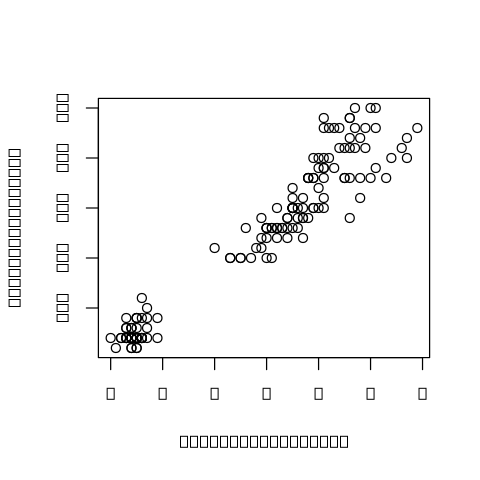

In [25]:
plot(iris$Petal.Length, iris$Petal.Width)

In [15]:
promedio_l = mean(iris$Petal.Length)
promedio_w = mean(iris$Petal.Width)

desviacion_l = sd(iris$Petal.Length)
desviacion_w = sd(iris$Petal.Width)

In [7]:
trans = cbind(iris)

In [9]:
trans$Petal.Length = iris$Petal.Length - l
trans$Petal.Width  = iris$Petal.Width  - w

In [16]:
iris_esc = cbind(trans)

In [17]:
iris_esc$Petal.Length = trans$Petal.Length / desviacion_l
iris_esc$Petal.Width  = trans$Petal.Width  / desviacion_w

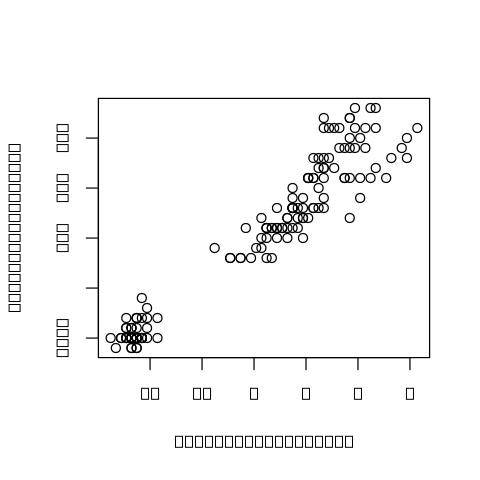

In [26]:
plot(trans$Petal.Length, trans$Petal.Width)

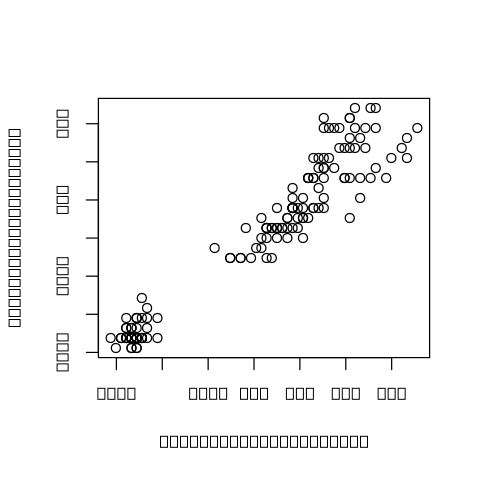

In [27]:
plot(iris_esc$Petal.Length, iris_esc$Petal.Width)

In [13]:
var(trans$Sepal.Width)

[1] 0.1899794

### Análsis de componentes principales

Bibliografía:
* http://cs229.stanford.edu/notes/cs229-notes10.pdf
* http://ufldl.stanford.edu/wiki/index.php/PCA

También conocido como PCA por sus siglas en inglés (*principal component analisys*).

PCA es un método de **reducción de dimensionalidad**; sirve para trabajar con menos variables de las que originalmente contamos. (Variable, atributo, dimensión son sinónimos.) ¿Menos es más? A veces sí.

1. Algunos algoritmos aprenden más rápidamente con menos atributos, el tiempo de procesamiento y el espacio de almacenamiento se reducen. Imaginemos pasar de 100 variables a 5.
2. Otra razón por la cuál descartar atributos es para evitar los temidos efectos de [sobreajuste](https://en.wikipedia.org/wiki/Overfitting) y [maldición de la dimensionalidad](https://en.wikipedia.org/wiki/Curse_of_dimensionality).
3. También sirve para graficar en 2D o en 3D datos de mayor dimensionalidad.

La reducción de dimensionalidad se logra en esencia a través de la [**selección de atributos**](https://en.wikipedia.org/wiki/Feature_selection), que es básicamente utilizar un criterio para seleccionar un subconjunto de atributos, no cualquier selección sino la más conveniente para nuestro modelo. La premisa es que los datos suelen contener atributos que son *irrelevantes* o *redundantes* y que pueden ser removidos sin incurrir en demasiada pérdida de información. Si dos atributos están fuertemente correlacionados entonces son redundantes. 

Existen diversas maneras de remover atributos ([algunas técnicas](http://scikit-learn.org/stable/modules/feature_selection.html)).

1. Conforme a su varianza,
2. según tests estadísticos,
3. según la información proporcionada por otros modelos,
4. eliminación recursiva.

Nos vamos a centrar en la primera de las opciones ya que es la utilizada por PCA—*descarta los atributos de menor varianza*. En general se considera que las dimensiones que varían poco no contribuyen a explicar los datos, son irrelevantes.

PCA es el producto de realizar una [**extracción de atributos**](https://en.wikipedia.org/wiki/Feature_extraction) seguida por una selección de atributos. La extracción de atributos es la generación de nuevos atributos a partir de los existentes por medio de una transformación. Este proceso no crea ni destruye información, solo cambia "el punto de vista" que se tiene de los datos en pos de conseguir atributos informativos y no redundantes.

En particular PCA realiza una transformación lineal de los datos, más específicamente, una rotación. Para lograr una rotación se definen nuevos ejes a partir de los originales (es lo que en álgebra lineal se conoce como *cambio de base*). Los nuevos ejes o atributos reciben el nombre de componentes principales. La primera componente principal es la dimensión que exhibe la mayor varianza. Las subsiguientes componentes principales se contruyen en base a las anteriores: la segunda, que es la segunda en varianza, forma un ángulo recto respecto de la primera, la tercera forma ángulos rectos respecto a la primera y a la segunda, así sucesivamente.

Luego de la rotación, opcional pero usualmente PCA selecciona las primeras componentes principales, que son las de mayor varianza. 

![](http://burn-research.be/wp-content/uploads/2015/03/PCA_scheme.0011.png)

In [33]:
#install.packages('ggExtra')

library('ggExtra')
library('ggplot2')

Temperatura diaria promedio cerca del nivel del mar.

- x: year 2000, day 50
- y: year 2000, day 51

- units: K

Fuente de datos: http://www.esrl.noaa.gov/psd/data/gridded/data.ncep.reanalysis.surface.html

In [109]:
datos <- read.table('pair0043.txt', col.names=c('temperatura', 'temperatura al día siguiente'))
head(datos)

temperatura,temperatura.al.día.siguiente
246.97,244.85
241.82,239.37
241.78,239.53
241.82,239.67
241.82,239.85
241.79,240.04


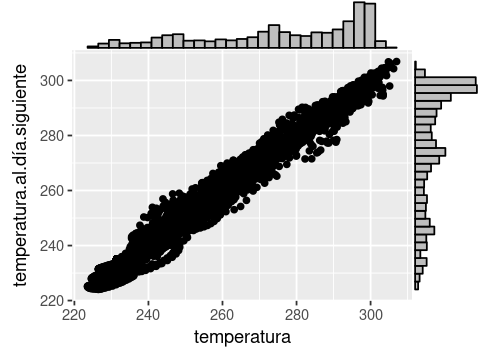

In [110]:
p <- ggplot(datos, aes(temperatura, temperatura.al.día.siguiente)) + geom_point() 

ggMarginal(p, type = 'histogram')

In [119]:
pca <- prcomp(datos, center=TRUE, scale.=FALSE)
datos.pca <- as.data.frame(predict(pca, datos))

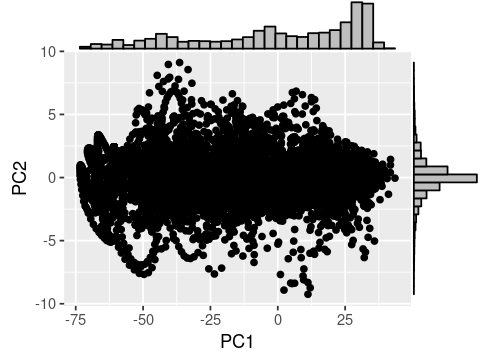

In [120]:
p <- ggplot(datos.pca, aes(PC1, PC2)) + geom_point() 

ggMarginal(p, type = 'histogram')

Hemos pasado de dos atributos (`temperatura` y `temperatura.al.día.siguiente`) con varianzas semejantes a dos atributos de los cuales uno (`PC2`) presenta mayor varianza respecto al otro (`PC2`).

In [121]:
pca

Standard deviations (1, .., p=2):
[1] 30.17544278650  1.56103443678

Rotation (n x k) = (2 x 2):
                                        PC1             PC2
temperatura                  0.708529947747 -0.705680744492
temperatura.al.día.siguiente 0.705680744492  0.708529947747

La rotación se interpreta como:

```
PC1 =   temperatura * 0.7 + temperatura.al.día.siguiente * 0.7
PC2 = - temperatura * 0.7 + temperatura.al.día.siguiente * 0.7
```

Los nuevos atributos, al ser una combinación de atributos reales, puede que carezcan de significado.

In [65]:
summary(pca)

Importance of components%s:
                              PC1          PC2
Standard deviation     1.41232497 0.0730629117
Proportion of Variance 0.99733000 0.0026700000
Cumulative Proportion  0.99733000 1.0000000000

Como los atributos están muy correlacionados vemos que son redundates y que solo con uno de los mismos alcanza para explicar el comportamiento de los datos.

---

El conjunto de datos anterior solo tiene dos atributos, fue usado como ejemplo para mostrar la rotación de los datos. Veamos que pasa con el conjunto de datos de flores de iris, que tiene cuatro dimensiones.

In [ ]:
https://media.giphy.com/media/Lyejb62QjQepG/source.gif

In [115]:
iris.pca <- prcomp(train[, 1:4], center=TRUE, scale.=FALSE) 

In [116]:
summary(iris.pca)

Importance of components%s:
                              PC1         PC2         PC3         PC4
Standard deviation     2.06072276 0.499990675 0.277605695 0.161907881
Proportion of Variance 0.92320000 0.054350000 0.016750000 0.005700000
Cumulative Proportion  0.92320000 0.977550000 0.994300000 1.000000000

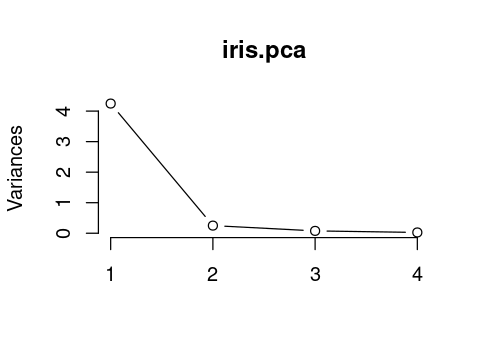

In [117]:
plot(iris.pca, type='l')

Es necesario decidir cuántas componentes principales conservar. Esto se puede hacer de varias maneras.

1. Entrenando y evaluando modelos, variando la cantidad de componentes principales, dejando que las métricas hablen.
2. Estableciendo una cota de antemano, por ejemplo el 95% de la varianza acumulada. Del reporte anterior vemos que PC1 y PC2 son suficientes ya que acumulan el 98% de la varianza de los datos.
3. Observando un gráfico como el anterior, haciendo un corte cuando las componentes dejan de aportar varianza significativamente.

### Con caret

Es posible especificar un umbral (`thresh`) de varianza.

In [84]:
trans <- preProcess(train[, 1:4], method=c('center', 'scale', 'pca'), thresh=0.6)
iris.pca <- predict(trans, test[, 1:4])

### SVM

In [88]:
#install.packages('e1071')

library(e1071)

In [89]:
modelo <- svm(Species ~ ., data=train, kernel='linear', cost=1, scale=FALSE)

In [90]:
summary(modelo)


Call:
svm(formula = Species ~ ., data = train, kernel = "linear", cost = 1, 
    scale = FALSE)


Parameters:
   SVM-Type:  C-classification 
 SVM-Kernel:  linear 
       cost:  1 
      gamma:  0.25 

Number of Support Vectors:  26

 ( 3 12 11 )


Number of Classes:  3 

Levels: 
 setosa versicolor virginica




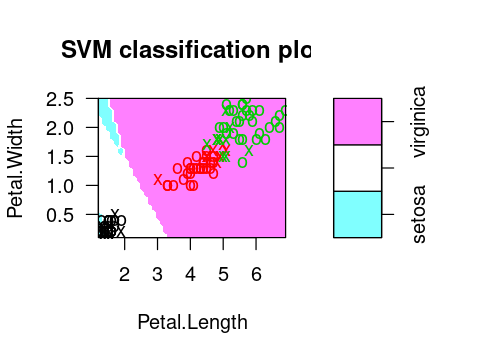

In [91]:
plot(modelo, train, Petal.Width ~ Petal.Length)

In [92]:
x <- subset(test, select=-Species)
y <- test$Species

In [93]:
pred <- predict(modelo, x)

In [94]:
table(pred, y)

            y
pred         setosa versicolor virginica
  setosa         10          0         0
  versicolor      0         10         0
  virginica       0          0        10

In [95]:
confusionMatrix(pred, y)

Confusion Matrix and Statistics

            Reference
Prediction   setosa versicolor virginica
  setosa         10          0         0
  versicolor      0         10         0
  virginica       0          0        10

Overall Statistics
                                          
               Accuracy : 1               
                 95% CI : (0.884296692, 1)
    No Information Rate : 0.333333333     
    P-Value [Acc > NIR] : 4.85693575e-15  
                                          
                  Kappa : 1               
 Mcnemar's Test P-Value : NA              

Statistics by Class:

                     Class: setosa Class: versicolor Class: virginica
Sensitivity            1.000000000       1.000000000      1.000000000
Specificity            1.000000000       1.000000000      1.000000000
Pos Pred Value         1.000000000       1.000000000      1.000000000
Neg Pred Value         1.000000000       1.000000000      1.000000000
Prevalence             0.333333333       0.3

In [103]:
ajuste <- tune.svm(Species ~ ., data=train, kernel='linear', cost=c(0.001, 0.01, 0.1, 1, 5, 10, 100) )

summary(ajuste)

In [106]:
summary(ajuste$best.model)


Call:
best.svm(x = Species ~ ., data = train, cost = c(0.001, 0.01, 0.1, 
    1, 5, 10, 100), kernel = "linear")


Parameters:
   SVM-Type:  C-classification 
 SVM-Kernel:  linear 
       cost:  1 
      gamma:  0.25 

Number of Support Vectors:  27

 ( 2 14 11 )


Number of Classes:  3 

Levels: 
 setosa versicolor virginica




### Recursos

http://www.r-bloggers.com


### Textos

- [An Introduction to R](https://cran.r-project.org/doc/manuals/R-intro.pdf) — W. N. Venables, D. M. Smith, R Core Team.

Más de programación, tiene modelos lineales.


- [R for Data Science](http://r4ds.had.co.nz) — Garrett Grolemund, Hadley Wickham.

Lo recomiendan en RStudio.


- [Introduction to Probability and Statistics Using R](https://cran.r-project.org/web/packages/IPSUR/vignettes/IPSUR.pdf) — G. Jay Kerns.

Mmm.


- [Advanced R](http://adv-r.had.co.nz) — Hadley Wickham.

Me sirvió la parte de estructuras de datos.


- [Vectores atómicos](http://arrgh.tim-smith.us/atomic.html)

Lectura obligada.


- [An Introduction to Statistical Learning with Applications in R](http://www-bcf.usc.edu/~gareth/ISL) — Gareth James, Daniela Witten, Trevor Hastie and Robert Tibshirani.

Es el que usé para aprendizaje automático. Está el **Elements of Statistical Learning** que es más avanzado.


- [Advanced Data Analysis from an Elementary Point of View](http://www.stat.cmu.edu/~cshalizi/ADAfaEPoV) — Cosma Rohilla Shalizi.

Cubre muchos tópicos avanzados, siendo exigente, desde un punto de vista elemental.


- Más textos:
  * https://r-dir.com/learn/e-books.html
  * https://www.ossblog.org/grasp-r-programming-open-source-books
  * http://freecomputerbooks.com/langRBooks.html